In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ratings = pandas.read_csv("./IMDb_Extensive_Dataset/IMDb ratings.csv")

En este archivo, vemos los ratings de las películas que existen en IMDb junto con bastante información agregada de las personas que están creando sus reviews. Mientras que no tenemos el contenido del review (lo que se escribió en el sitio), lo que si tenemos es el valor numérico y una descomposición de los votos por grupos poblacionales. Por ejemplo, se incluyen los votos de hombres y mujeres por grupos poblacionales. 

In [8]:
pandas.set_option('display.max_columns', None)  
display(ratings.head())

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


Empezemos por recaudar un poco de información de las variables presentes en `ratings`, nuestro DataFrame. 

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

Ya podemos empezar a ver algunos datos interesantes. Por la distribución de los datos, podemos ver que hay $85855$ películas en total. Todas estas películas tienen votos, que es bueno. Algo importante es que no tenenmos los nombres de las películas, pero solamente su `IMDb_title_id`. Esto es bueno, ya que podemos acceder otros archivos (en particular, el de `movies` tiene los nombres). Pero, también es un problema. Tenemos dos bases de datos de dos compañías distintas, y ambas son diferentes y tienen IDs distintas. No podemos estar seguros que estamos linkeando los votos a las películas adecuadas de ambas bases. No podemos usar el nombre, ya que hay muchísimas películas que se llaman *Godzilla* por ejemplo. Tendremos que ver que hacer aquí. 

Por ahora, veamos la distribución de los votos promedio, con pesos y sin pesos. 

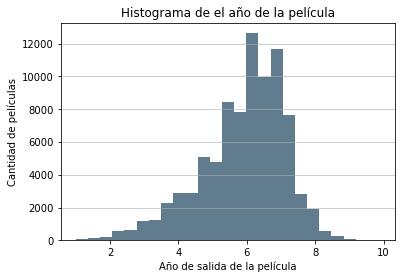

In [25]:
ratings['weighted_average_vote'].plot.hist(grid=False, bins=25,
                   color='#607c8e')
plt.title('Histograma de el año de la película')
plt.xlabel('Año de salida de la película')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.75)

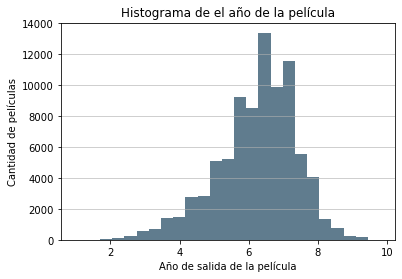

In [24]:
ratings['mean_vote'].plot.hist(grid=False, bins=25,
                   color='#607c8e')
plt.title('Histograma de el año de la película')
plt.xlabel('Año de salida de la película')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.75)

Aquí ya podemos ver datos interesantes. Los reviews con un peso tienen una distribución muy parecida a los que nada más son el promedio de los votos. Pero, si hay diferencias sutiles. También notamos que estos datos **no son continuos**, son discretos. Están redondeados a un valor más cercano de un decimal, entonces podemos ver valores como $3.5$, pero no como $3.05$.

Podemos comparar sus medias para ver esto. 

In [35]:
pandas.Series.describe(ratings['mean_vote'])

count    85855.000000
mean         6.226342
std          1.155280
min          1.000000
25%          5.600000
50%          6.400000
75%          7.000000
max          9.800000
Name: mean_vote, dtype: float64

In [34]:
pandas.Series.describe(ratings['weighted_average_vote'])

count    85855.000000
mean         5.898656
std          1.234987
min          1.000000
25%          5.200000
50%          6.100000
75%          6.800000
max          9.900000
Name: weighted_average_vote, dtype: float64

Resulta que al tomar los datos con un peso (este peso no lo sabemos) hace que el promedio de votos en general baje. Me imagino entonces que los datos muestran que las personas que tienen muchas reviews son mas críticos, y lo podemos verificar. 

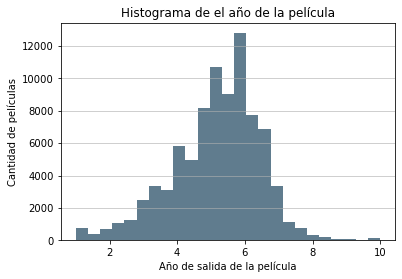

In [28]:
ratings['top1000_voters_rating'].plot.hist(grid=False, bins=25,
                   color='#607c8e')
plt.title('Histograma de el año de la película')
plt.xlabel('Año de salida de la película')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.75)

In [33]:
pandas.Series.describe(ratings['top1000_voters_rating'])

count    85176.000000
mean         5.155706
std          1.290920
min          1.000000
25%          4.400000
50%          5.300000
75%          6.000000
max         10.000000
Name: top1000_voters_rating, dtype: float64

Aquí, vemos la dostribución de los votos de las 1000 personas más activas en el sitio de IMDb. Este promedio es de más de un punto menor que tomar los votos en general, entonces podemos concluir que la gente que sabe más de películas es más crítica que el público en general. Vemos otro dato interesante, y es que la desviación estándar de los datos es más alta para los 1000 votadores más activos, lo que significa que tienden a dar reviews más altas o bajas que el promedio. 